In [1]:
import pandas as pd

from sqlalchemy import create_engine

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create uri to pull data from pdadmin database
user = "postgres"
password = "246800"
host = "localhost"
port = "5432"
db = "data_engineering_sql"
uri = f"postgresql://{user}:{password}@{host}:{port}/{db}"

In [3]:
# Create Engine
engine = create_engine(uri)
conn = engine.connect()

In [4]:
# Query employees records in the Database
sql_employees = pd.read_sql('SELECT * FROM employees',conn)
# Query salaries records in the Database
sql_salaries = pd.read_sql('SELECT * FROM salaries',conn)
# Query titles records in the Database
sql_titles = pd.read_sql('SELECT * FROM titles',conn)


Text(0, 0.5, 'salary frequency')

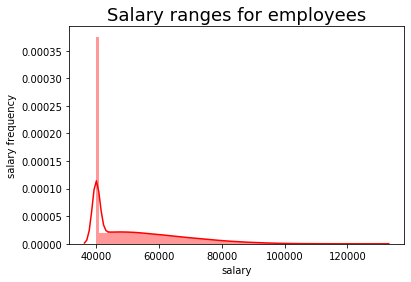

In [5]:
#create a histogram to visualize the most common salary ranges for employees
sns.distplot(sql_salaries['salary'],kde=True, color='red', bins=100)
plt.title('Salary ranges for employees',fontsize = 18)
plt.xlabel('salary')
plt.ylabel('salary frequency')

In [6]:
#merge title and salary
merge_file = sql_titles.merge(sql_salaries,on="emp_no",how='left')
merge_df = merge_file[['title','salary']]
#group by dataframe by title
merge_df_groupby = merge_df.groupby(['title'])

In [7]:
#get average salary for each title
average_salary= merge_df_groupby["salary"].mean().round(2)
average_salary_df = pd.DataFrame(average_salary)
average_salary_df_reset = average_salary_df.reset_index()

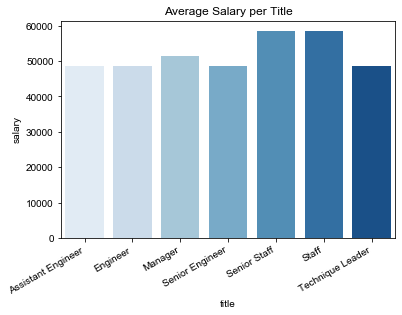

In [8]:
#Bar Chart for Average Salary per title
chart = sns.barplot(x="title",
                    y="salary",
                    data=average_salary_df_reset,
                   palette="Blues").set_title('Average Salary per Title')
plt.xticks(rotation=30, ha='right')
sns.set(font_scale=0.5)